### Librerías

In [55]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import ensemble
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Lectura de datos

In [56]:
def load_data(path):
    """
    Función para cargar los datos
    """
    data=pd.read_excel(path,index_col=0)
    X = data.drop(columns='Defaulted Payment Next Month')
    Y= data['Defaulted Payment Next Month']
    return X, Y

### Preprocesamiento de datos

In [57]:
def preprocess_data(X_train, X_test):
    """
    Preprocesamiento de los datos
    """

    # Estandarizar los datos
    # Dtos quedan con media 0 desviación 1
    scaler = StandardScaler().fit(X_train)
    X_train_standard = scaler.transform(X_train)
    X_test_standard = scaler.transform(X_test)
    
    
    return X_train_standard , X_test_standard

### Arquitectura

In [58]:

def get_model():
    """
    Arquitectura de la red
    """
    # Definir el modelo
    model = Sequential()
    model.add(Dense(32, input_shape=(83,), activation='relu')),
    model.add(Dropout(0.2)),
    model.add(Dense(16, activation='relu')),
    model.add(Dropout(0.2)),
    model.add(Dense(8, activation='relu')),
    model.add(Dropout(0.2)),
    model.add(Dense(4, activation='relu')),
    model.add(Dropout(0.2)),
    model.add(Dense(1, activation='sigmoid'))

    # Compilar el modelo
    model.compile(
        optimizer=Adam(),
        #Binary _cross.. porque son solo 2 clases
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    # Resumen del modelo
    print(model.summary())

    return model

### Entrenamiento

In [59]:
def train_neural_network(model, X_train, y_train):
    """
    Entrenamiento del clasificador
    """

    checkpoint = ModelCheckpoint("modelo.keras", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)    

    # Entrenar el modelo
    history = model.fit(
        x=X_train,
        y=y_train,
        epochs=20,
        validation_split=0.2,
        callbacks=[checkpoint, early_stopping]
    )


    return history

### Métricas

In [60]:
def calculate_metrics(y_real, y_pred, labels):
    """
    Cálculo de métricas de evaluación del modelo
    """
    accuracy = accuracy_score(y_real, y_pred)
    print("Accuracy del modelo:", accuracy)

    print("\nInforme de clasificación:")
    print(classification_report(y_real, y_pred))

    # Matriz de confusión
    plt.figure()
    cm = confusion_matrix(y_real, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot()

### Visualización de resultados

In [61]:
def visualize_training(history):
    """
    Visualización del entrenamiento
    """
    # Generar y mostrar las curvas de pérdida versus epoch
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

### Pipeline

In [62]:
def pipeline():
    """
    Pipeline para entrenar y evaluar el modelo
    """
    # Cargar las imágenes
    X, y = load_data('./datos_limpios.xlsx')

    # Dividir los datos en conjunto de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocesamiento de datos
    X_train_processed, X_test_processed = preprocess_data(X_train, X_test)

    # Entrenamiento del modelo
    model = get_model()
    history = train_neural_network(model, X_train_processed, y_train)

    # Predicciones en el conjunto de prueba
    y_pred = model.predict(X_test_processed)
    y_pred = (y_pred > 0.5)

    # Métricas de evaluación
    calculate_metrics(y_test, y_pred, ['Not Defaulted', 'Defaulted'])

    # Visualización de algunas predicciones
    visualize_training(history)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                2688      
                                                                 
 dropout_18 (Dropout)        (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dropout_19 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 8)                 136       
                                                                 
 dropout_20 (Dropout)        (None, 8)                 0         
                                                                 
 dense_26 (Dense)            (None, 4)                

<Figure size 640x480 with 0 Axes>

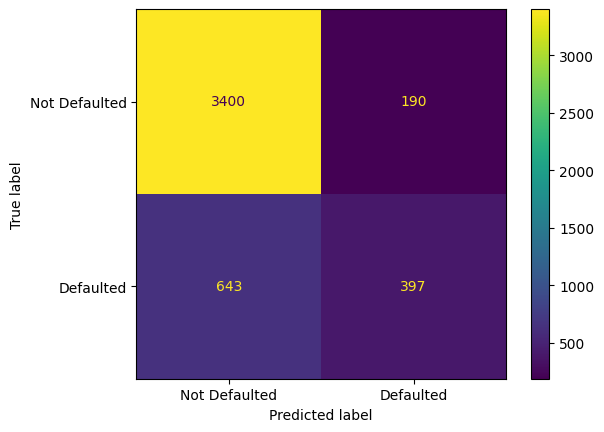

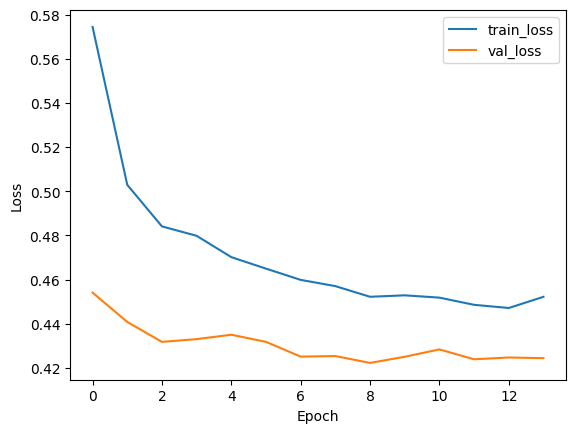

In [63]:
pipeline()